<a href="https://colab.research.google.com/github/esramostafa20/A-B-testing/blob/main/EDA_OF_Top100Richest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data1=pd.read_csv('/content/top_100_richest.csv')
data1.head(5)

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   name         100 non-null    object 
 2   net_worth    100 non-null    object 
 3   bday         94 non-null     object 
 4   age          95 non-null     float64
 5   nationality  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
data1.isnull().sum()

,0
rank,0
name,0
net_worth,0
bday,6
age,5
nationality,0


In [6]:
data1.dropna()

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,$240 Billion,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,$150 Billion,12-Jan-64,58.0,United States of America
2,3,Gautam Adani,$138 Billion,24-Jun-62,60.0,India
3,4,Bernard Arnault,$135 Billion,5-Mar-49,73.0,France
4,5,Bill Gates,$118 Billion,28-Oct-55,66.0,United States of America
...,...,...,...,...,...,...
95,96,Prince Al Waleed Bin Talal Alsaud,$17 Billion,7-Mar-55,67.0,Saudi Arabia
96,97,Harold Hamm,$17 Billion,11-Dec-45,76.0,United States of America
97,98,Viktor Vekselberg,$17 Billion,14-Apr-57,65.0,Russia
98,99,Steven Cohen,$16 Billion,11-Jun-56,66.0,United States of America


In [7]:
data1.isnull().sum()

,0
rank,0
name,0
net_worth,0
bday,6
age,5
nationality,0


In [11]:
data1.duplicated().sum()


np.int64(0)

In [15]:
# Clean the 'net_worth' column
data1['net_worth'] = data1['net_worth'].str.replace('$', '', regex=False)
data1.head(3)

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,240 Billion,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,150 Billion,12-Jan-64,58.0,United States of America
2,3,Gautam Adani,138 Billion,24-Jun-62,60.0,India


In [16]:
data1['net_worth'] = data1['net_worth'].str.replace('Billion', '', regex=False)
data1.head(3)

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,240,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,150,12-Jan-64,58.0,United States of America
2,3,Gautam Adani,138,24-Jun-62,60.0,India


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   name         100 non-null    object 
 2   net_worth    100 non-null    object 
 3   bday         94 non-null     object 
 4   age          95 non-null     float64
 5   nationality  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [18]:
data1['net_worth']=data1['net_worth'].astype(float)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         100 non-null    int64  
 1   name         100 non-null    object 
 2   net_worth    100 non-null    float64
 3   bday         94 non-null     object 
 4   age          95 non-null     float64
 5   nationality  100 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.8+ KB


In [19]:
data1.head(3)

,rank,name,net_worth,bday,age,nationality
0,1,Elon Musk,240.0,28-Jun-71,51.0,South Africa
1,2,Jeff Bezos,150.0,12-Jan-64,58.0,United States of America
2,3,Gautam Adani,138.0,24-Jun-62,60.0,India


In [24]:
national_sizes = data1['nationality'].value_counts().tolist()
national_sizes

[36, 11, 9, 6, 5, 4, 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

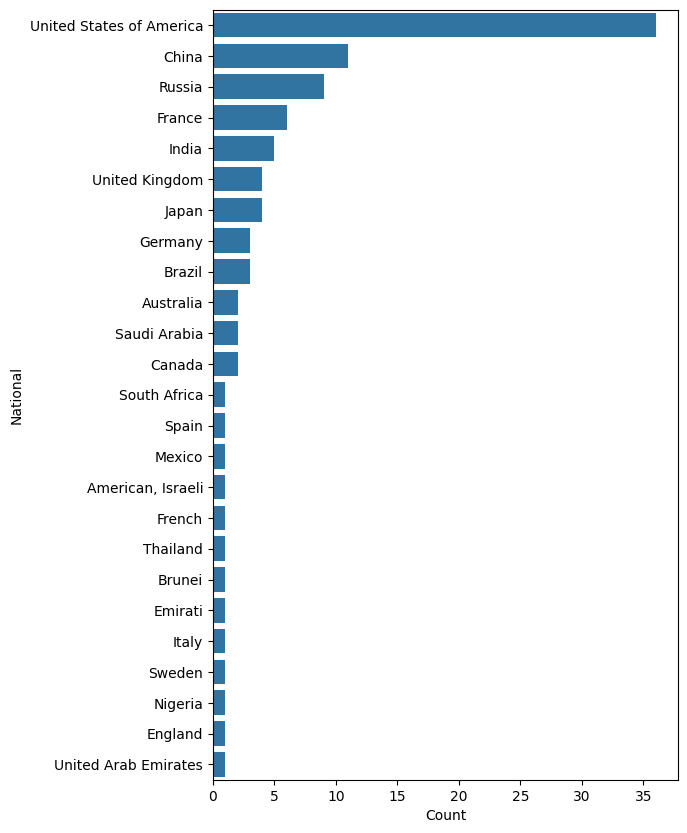

In [25]:
national_sizes = data1.nationality.value_counts().tolist()
national_labels = []
none = [national_labels.append(i[0]) for i in data1['nationality'].value_counts().items()]



plt.figure(figsize=(6,10))
sns.barplot(x=national_sizes,y=national_labels)
plt.xlabel('Count')
plt.ylabel('National')
plt.show()

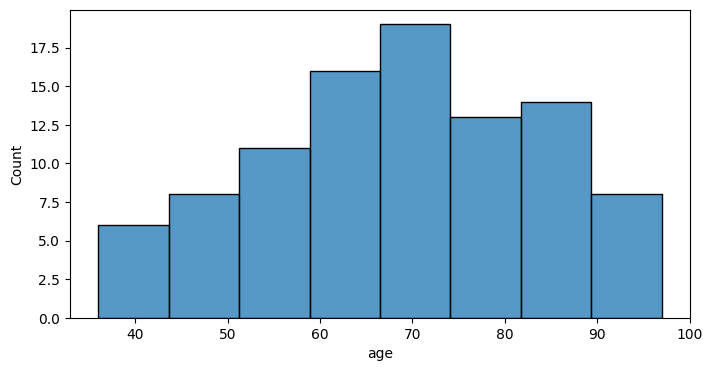

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(x=data1.age)
plt.show()

In [28]:
data1['generation']=['WWII'if i >94
                    else 'Post War' if i>76
                    else 'Boomers I' if i>67
                    else 'Boomers II' if i>57
                    else 'Gen X' if i>41
                    else 'Gen Y' for i in data1.age]

In [29]:
data1.head(3)

,rank,name,net_worth,bday,age,nationality,generation
0,1,Elon Musk,240.0,28-Jun-71,51.0,South Africa,Gen X
1,2,Jeff Bezos,150.0,12-Jan-64,58.0,United States of America,Boomers II
2,3,Gautam Adani,138.0,24-Jun-62,60.0,India,Boomers II


(np.float64(-1.0999958927342808),
 np.float64(1.1000041072657194),
 np.float64(-1.1),
 np.float64(1.1))

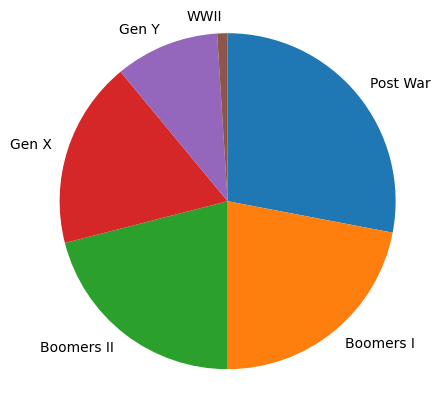

In [32]:
sorted_counts = data1['generation'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);
plt.axis('square')

In [33]:
data1.head(3)

,rank,name,net_worth,bday,age,nationality,generation
0,1,Elon Musk,240.0,28-Jun-71,51.0,South Africa,Gen X
1,2,Jeff Bezos,150.0,12-Jan-64,58.0,United States of America,Boomers II
2,3,Gautam Adani,138.0,24-Jun-62,60.0,India,Boomers II


In [35]:
data1.bday.unique()

array(['28-Jun-71', '12-Jan-64', '24-Jun-62', '5-Mar-49', '28-Oct-55',
       '30-Aug-30', '26-Mar-73', '21-Aug-73', '24-Mar-56', '17-Aug-44',
       nan, '19-Apr-57', '28-Jan-40', '7-Oct-52', '10-Jul-53',
       '28-Mar-36', '14-Feb-42', '14-May-84', '28-Oct-44', '7-Jun-48',
       '7-Oct-49', '12-Apr-62', '1-Nov-35', '23-Feb-65', '21-Aug-36',
       '12-Jun-57', '29-Oct-71', '28-Sep-48', '17-Apr-51', '1-Apr-83',
       '7-Feb-49', '15-Oct-35', '10-Oct-39', '24-Feb-38', '3-Jan-61',
       '14-Feb-47', '15-Oct-64', '10-Oct-45', '1-Jan-80', '29-Jan-28',
       '14-Jun-57', '29-Jul-28', '9-Feb-54', '20-Nov-70', '11-Aug-57',
       '15-Jul-46', '28-Jul-52', '21-Sep-64', '15-Oct-68', '19-Dec-61',
       '5-Oct-42', '24-Sep-39', '1-Oct-71', '14-Jul-45', '4-Oct-47',
       '1-Sep-38', '20-Feb-70', '16-Feb-36', '10-Jun-45', '21-Jun-67',
       '16-Aug-31', '26-Aug-39', '27-Apr-55', '5-Apr-75', '25-Apr-38',
       '2-May-47', '10-Apr-57', '19-Mar-33', '8-Mar-72', '29-Aug-31',
       '31-Dec-35

In [36]:
data1['bday'] = data1['bday'].str.extract(r'-([A-Za-z]+)-')
data1.head(3)

,rank,name,net_worth,bday,age,nationality,generation
0,1,Elon Musk,240.0,Jun,51.0,South Africa,Gen X
1,2,Jeff Bezos,150.0,Jan,58.0,United States of America,Boomers II
2,3,Gautam Adani,138.0,Jun,60.0,India,Boomers II


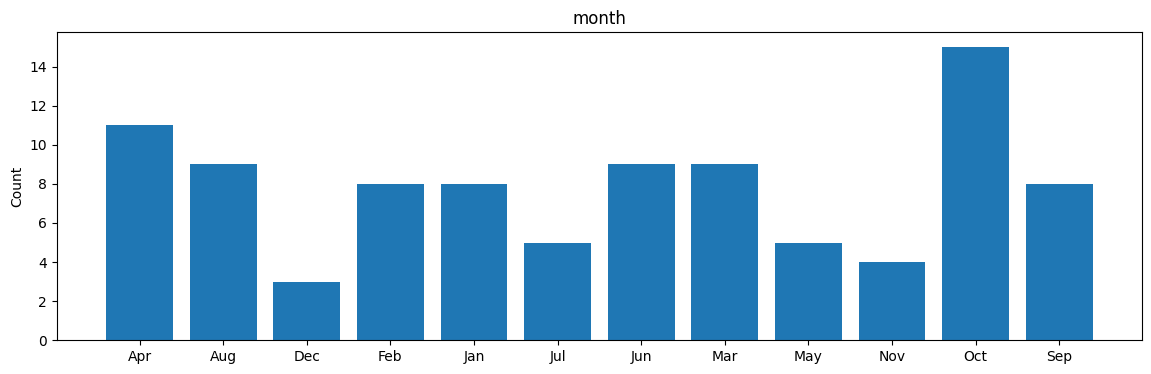

In [45]:
month_sizes = data1.bday.value_counts(sort=False).tolist()
month_labels = []
none = [month_labels.append(i[0]) for i in data1.bday.value_counts(sort=False).items()]


def bar_plot(sizes,labels,title):
    fig, ax = plt.subplots(figsize=(14, 4))

    #plt.xticks(rotation=90)
    ax.bar(labels, sizes)

    ax.set_ylabel('Count')
    ax.set_title(title)

    plt.show()

bar_plot(month_sizes,month_labels,'month')


In [52]:
may_born = data1[data1['bday'] == 'May']
may_names = may_born['name'].tolist()

print("Billionaires born in May:", may_names)

Billionaires born in May: ['Vladimir Lisin', 'Donald Bren', 'Stefan Quandt', 'James Dyson', 'Mark Zuckerberg']


In [54]:
may_nationality = may_born['nationality'].tolist()

print("Billionaires born in May:", may_nationality)

Billionaires born in May: ['Russia', 'United States of America', 'Germany', 'United Kingdom', 'United States of America']


#1. put all emirates
#2. change the bday after removing the days to Birth Month